In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import decision_regions

dataset = pd.read_csv(r"C:\Users\Ahsan\Downloads\imbalanced_social_network_data (1).csv")

print(dataset.head(4))

   Age  EstimatedSalary  Purchased
0   28            50319          0
1   34            70951          0
2   50            34619          0
3   33           133612          0


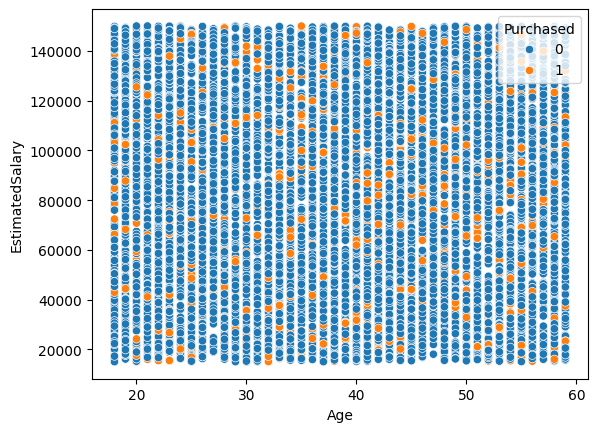

In [6]:
sns.scatterplot(x = "Age" , y = "EstimatedSalary" , data = dataset , hue="Purchased")
plt.show()

In [7]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
x = dataset.iloc[: , :-1]
y= dataset["Purchased"]

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x) , columns=x.columns)

In [11]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.25, random_state=50)

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [104]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [105]:
dt.score(x_test,y_test)*100

90.24

In [106]:
dt.score(x_train,y_train)*100

90.0

In [107]:
dt.predict([(28,50319)])

C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


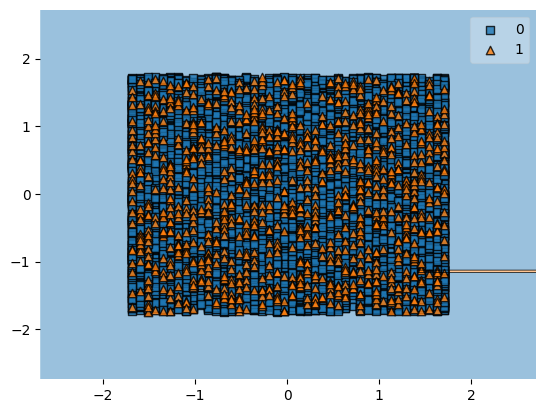

In [108]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)
plt.show()

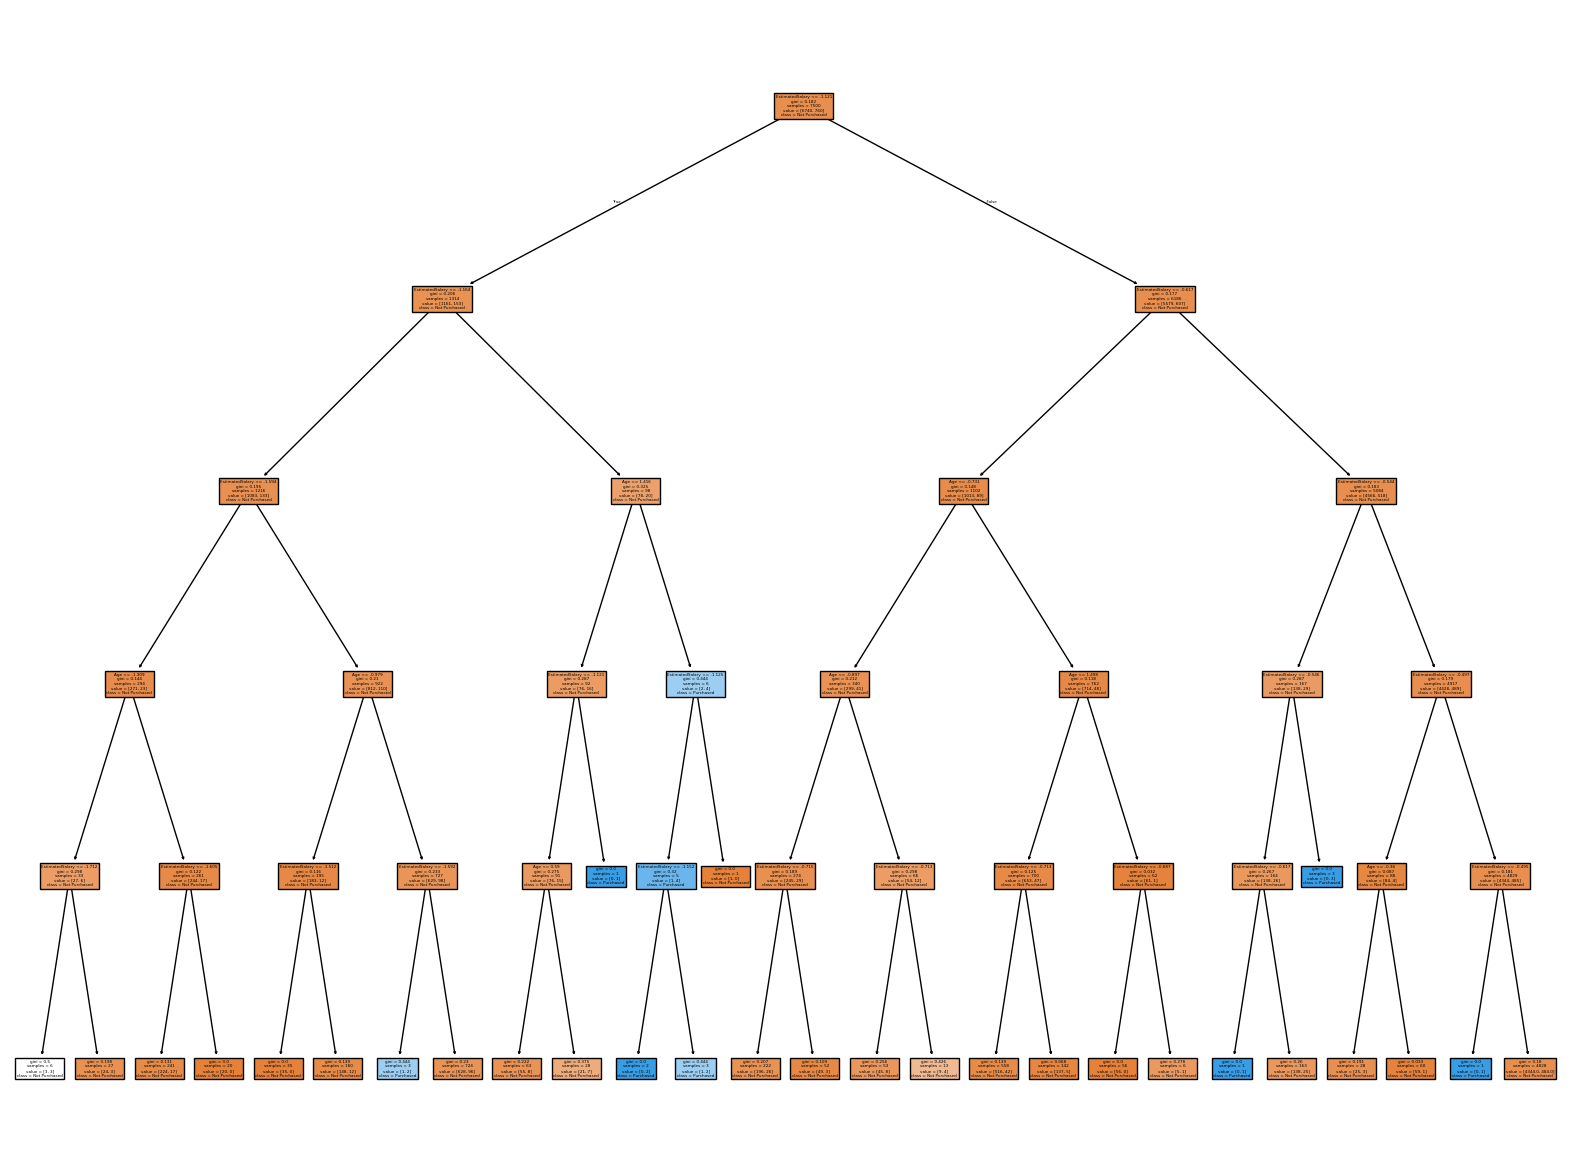

In [109]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20,15))
plot_tree(
    dt,
    filled=True,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['Not Purchased', 'Purchased']
)
plt.show()